In [78]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
%matplotlib inline

Load Changesets per 4 hour bins and split them out...

In [70]:
with open('json/user_counts_per_4hour.json') as data_file:    
    data = json.load(data_file)
    
'2015-04-25 00:00:00 +0000'

format = '%Y-%m-%d %H:%M:%S +0000'

all_users = [int(x["all_users"]) for x in data]
hot_users = [int(x["hot_users"]) for x in data]
times     = [datetime.strptime(x["time"],format) for x in data]

Now Plot them!

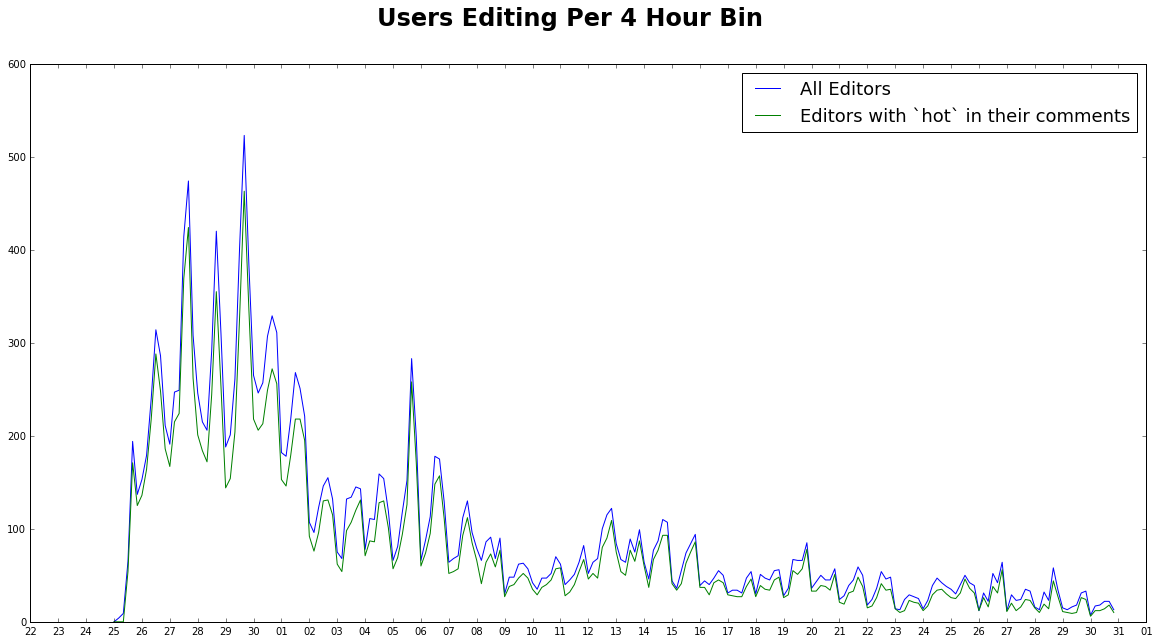

In [99]:
# x_axis    = datetime.datetime(times)
x = dates.date2num(times)

fig = plt.figure()
ax  = fig.add_subplot(111)
fig.set_size_inches(20, 10)

ax.plot(x, all_users, label="All Editors") #width=0.1, color='r',align='center')
ax.plot(x, hot_users, label="Editors with `hot` in their comments") #width=0.1, color='b',align='center')

ax.xaxis.set_major_locator(dates.DayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.legend(fontsize=18)

fig.suptitle('Users Editing Per 4 Hour Bin', fontsize=24, fontweight='bold')


In [102]:
with open('json/cumulative_user_count.json') as data_file:    
    cumulative_users = json.load(data_file)
    
'2015-04-25 00:00:00 +0000'

format = '%Y-%m-%d %H:%M:%S +0000'

cumulative_all_users = [int(x["all_users"]) for x in cumulative_users]
cumulative_hot_users = [int(x["hot_users"]) for x in cumulative_users]
times     = [datetime.strptime(x["time"],format) for x in cumulative_users]

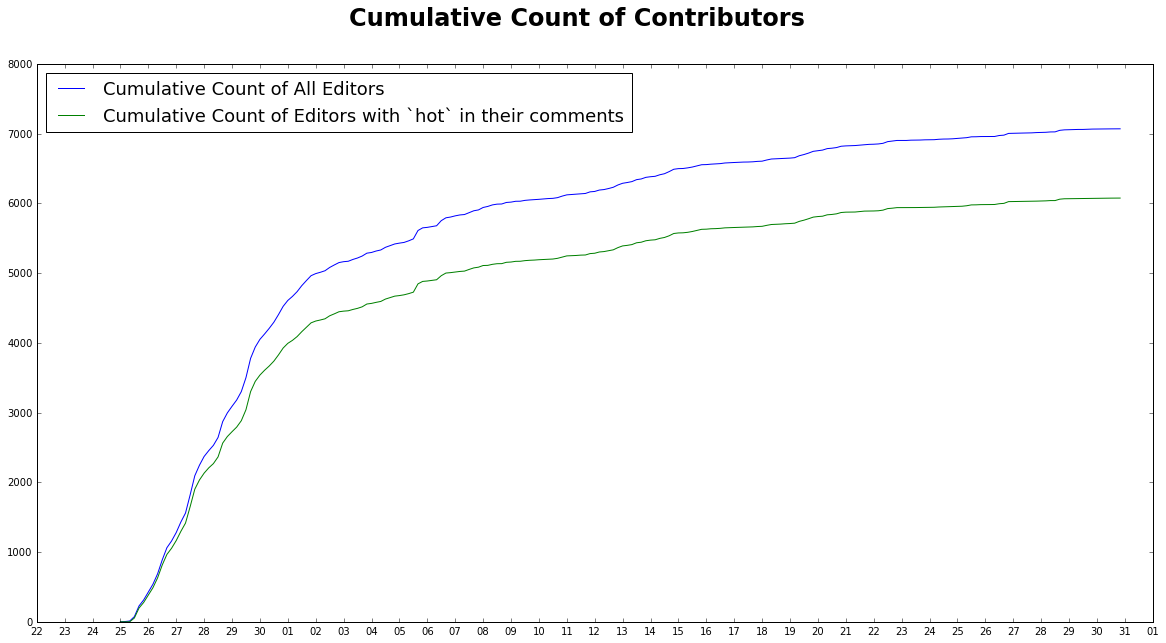

In [106]:
x = dates.date2num(times)

fig = plt.figure()
ax  = fig.add_subplot(111)
fig.set_size_inches(20, 10)

ax.plot(x, cumulative_all_users, label="Cumulative Count of All Editors") #width=0.1, color='r',align='center')
ax.plot(x, cumulative_hot_users, label="Cumulative Count of Editors with `hot` in their comments") #width=0.1, color='b',align='center')

ax.xaxis.set_major_locator(dates.DayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.legend(fontsize=18, loc="best")

fig.suptitle('Cumulative Count of Contributors', fontsize=24, fontweight='bold')
